**Iris Dataset Prediction using Decision Tree Classifier and EDA**

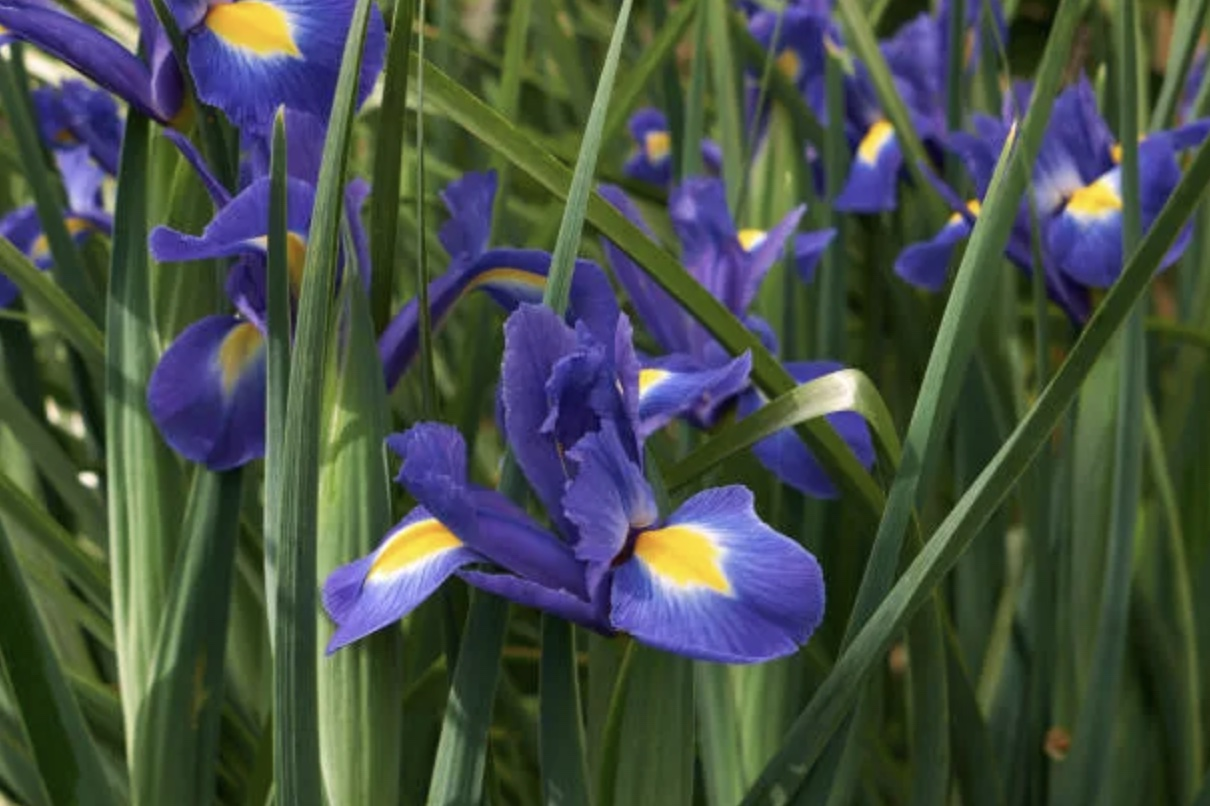

img_src= https://www.istockphoto.com/photos/iris-plant

by Yoihen Elangbam

Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()
X = iris.data  # the Features (petal length, petal width, etc.)
y = iris.target

iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = y

print("Iris Dataset Sample:\n", iris_df.head())  #first 5 rows

Iris Dataset Sample:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


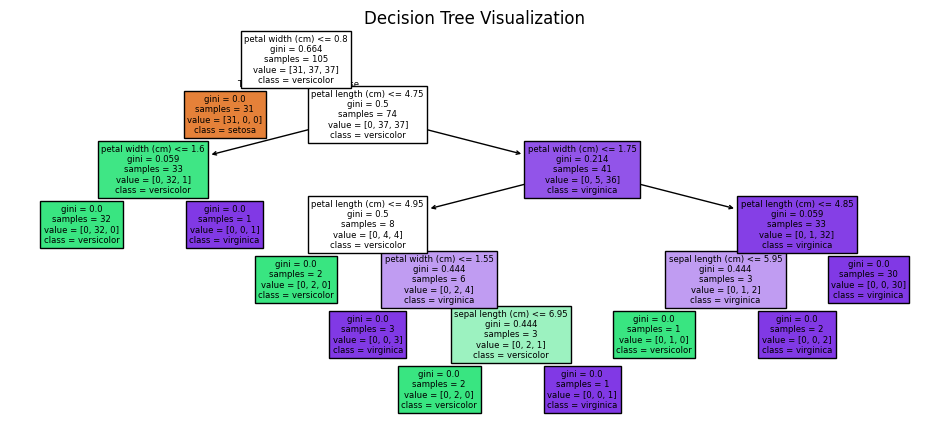





Decision Tree Rules:
 |--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |   |--- class:

In [7]:
plt.figure(figsize=(12, 5))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()
print("\n\n\n")
tree_rules = export_text(clf, feature_names=iris.feature_names)
print("Decision Tree Rules:\n", tree_rules)

EDA

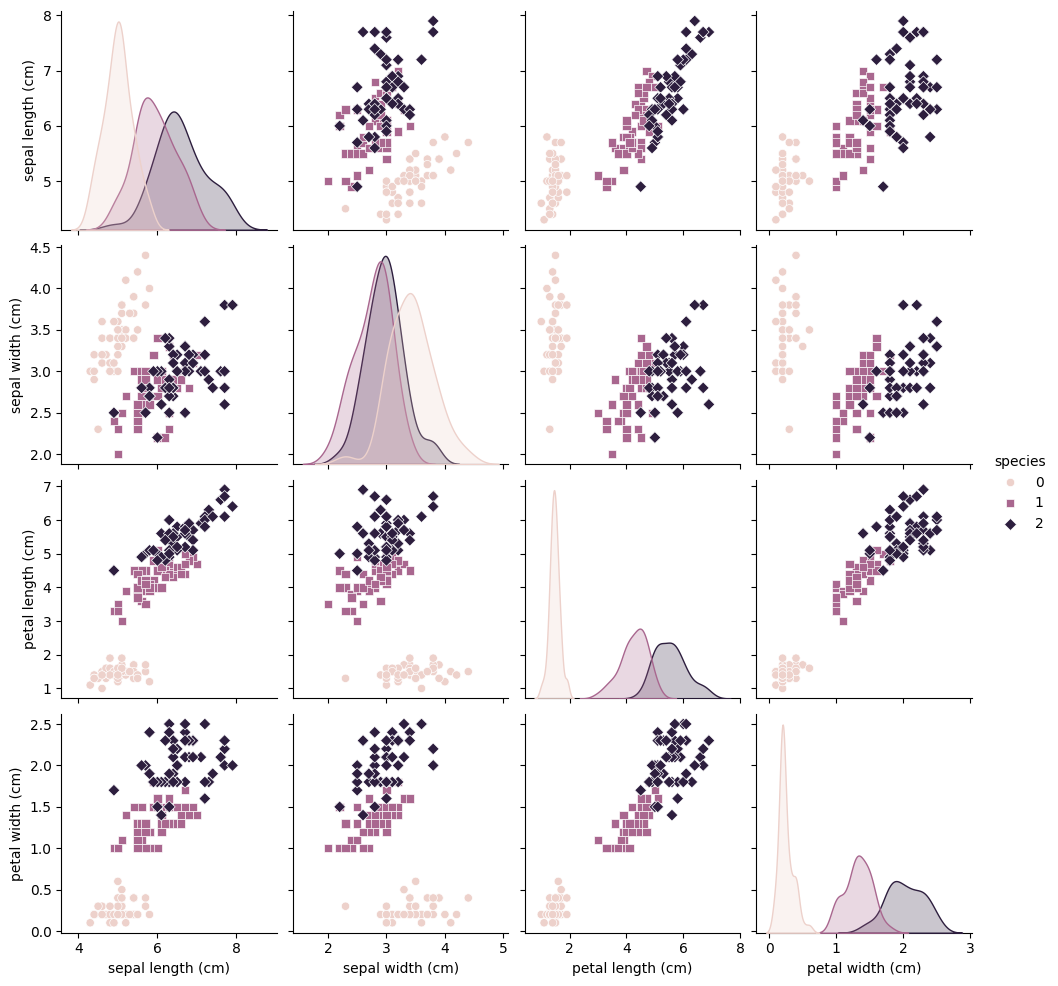

In [8]:
import seaborn as sns
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.show()

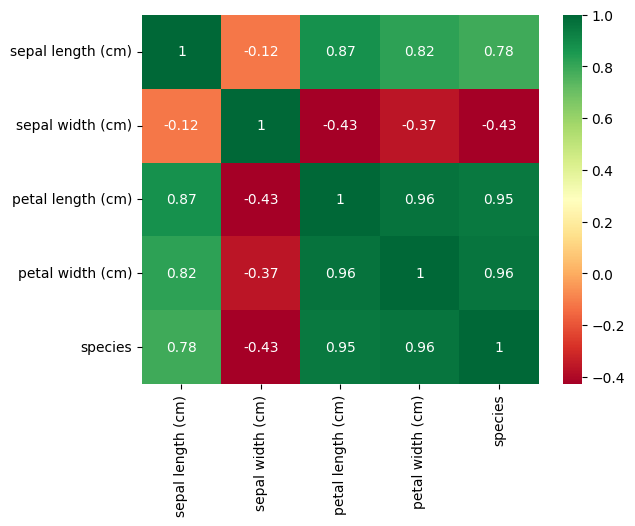

In [9]:
correlation_matrix = iris_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.show()

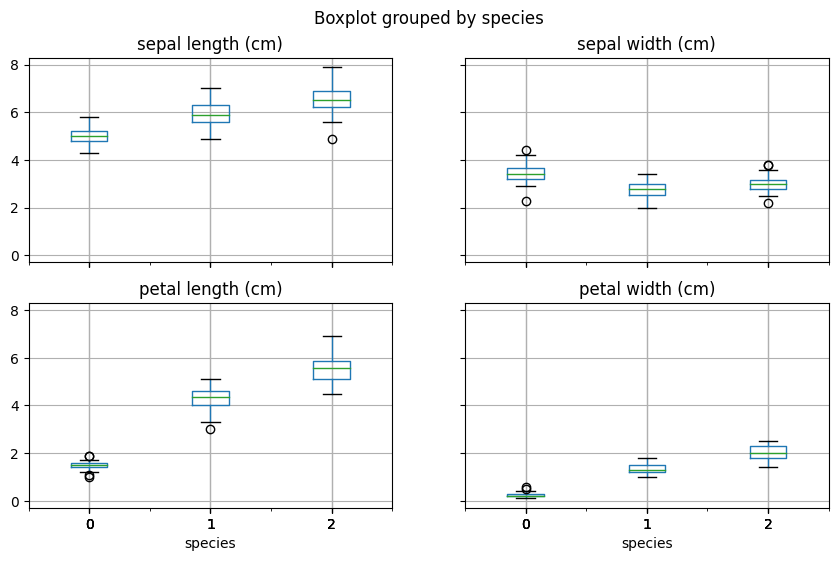

In [10]:
iris_df.boxplot(column=iris.feature_names, by='species', figsize=(10,6))
plt.show()

Variance by each PC: [0.92461872 0.05306648]


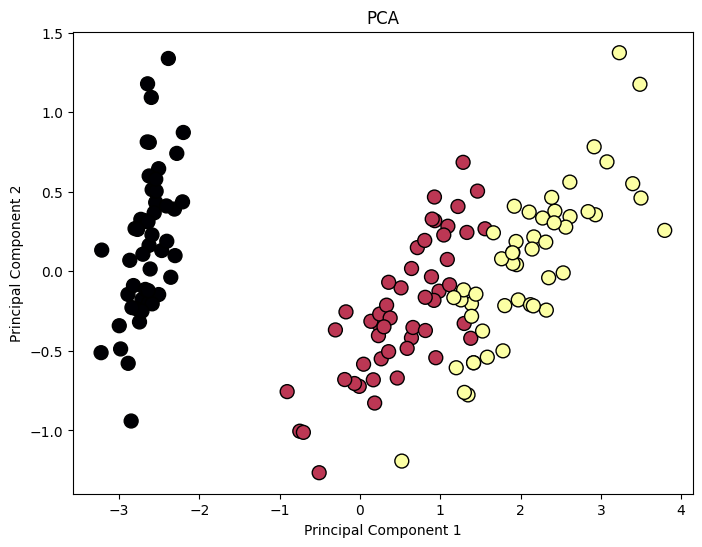

In [11]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8,6))
explained_variance = pca.explained_variance_ratio_
print("Variance by each PC:", explained_variance)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='inferno', edgecolor='k', s=100)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

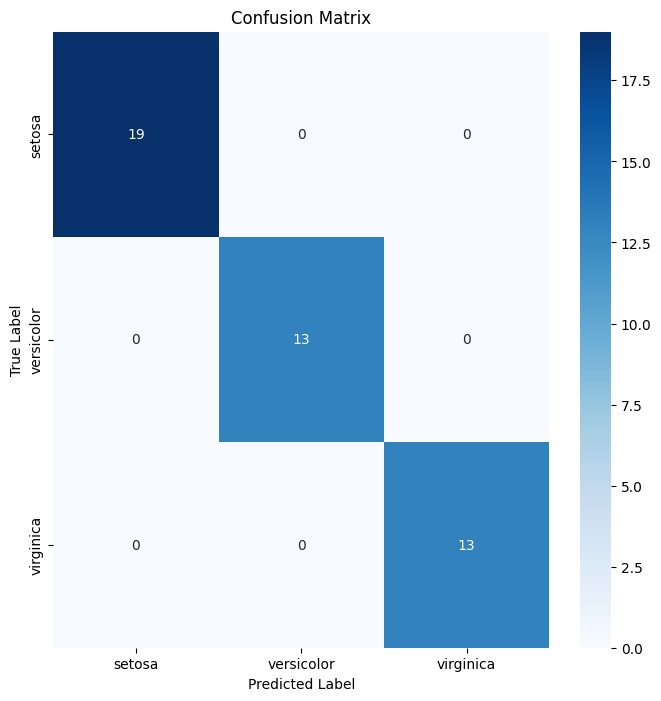





Classification Report:
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| setosa       |           1 |        1 |          1 |        19 |
| versicolor   |           1 |        1 |          1 |        13 |
| virginica    |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |        45 |
| weighted avg |           1 |        1 |          1 |        45 |
+--------------+-------------+----------+------------+-----------+


In [12]:
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_df = pd.DataFrame(conf_matrix, index=iris.target_names, columns=iris.target_names)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n\n\n")

class_report = classification_report(y_test, y_pred, target_names=iris.target_names, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

table = tabulate(class_report_df, headers='keys', tablefmt='psql')

print("Classification Report:")
print(table)

**Testing using User Input Variables**

In [13]:
sample_1 = [[5.1, 3.5, 1.4, 0.2]]  # Sepal Length, Sepal Width, Petal Length, Petal Width

prediction_1 = clf.predict(sample_1)
print(f"Predicted Class for Sample 1: {iris.target_names[prediction_1][0]}")

Predicted Class for Sample 1: setosa


In [14]:
sample_2 = [[6.0, 2.2, 4.0, 1.0]]

prediction_2 = clf.predict(sample_2)
print(f"Predicted Class for Sample 2: {iris.target_names[prediction_2][0]}")

Predicted Class for Sample 2: versicolor


In [15]:
sample_3 = [[6.9, 3.1, 5.4, 2.1]]

prediction_3 = clf.predict(sample_3)
print(f"Predicted Class for Sample 3: {iris.target_names[prediction_3][0]}")

Predicted Class for Sample 3: virginica
